# Centro Galactico sobre el cielo de Chacaltaya


In [1]:
%matplotlib inline
import ephem
import numpy as np
from numpy import sin, cos,tan, arcsin, arctan,pi, arccos,radians, degrees
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
%%latex
If we describe the movement of the source in the local sky in spherical coordinates we have the advantage of posseing only two degrees of freedom given that $r$ is virtually constant, virtually because this only true for practical porpuse. The source's movement will be then described by:

 \begin{equation}
  \theta'_{t} =  \arccos(\cos(\delta)\sin( \omega t ))
\end{equation}
\begin{equation}
  \phi'_{t} = \arctan\left(\frac{\tan(\delta)}{\cos(\omega t)}\right)
\end{equation}
Here $t$ represents the time, $\omega$ the rotational speed of the Earth and $\delta$ the Declinatino at wich the source is located.

<IPython.core.display.Latex object>

In [3]:
la=radians(0)

def phi(t,w):
    W=radians(w) #velocidad angular de rotacion de la tierra
    wt= (W*t)+(pi/2)
    p=arctan((sin(wt))/tan(la))
    Pdegrees=degrees(p)
#    return Pdegrees
    return p


def theta(t,w):
    W=radians(w) #velocidad angular de rotacion de la tierra
    wt= W*t+(pi/2)
    th=arccos(cos(la)*cos(wt))
    THdegrees=degrees(th)
    return th


In [4]:
%%latex

The primed system would be de system of an observer that is in the ecuator, but if we need the path of the source in a place not in the ecuator we proceed to rotate the primed system as many degrees as the observer is away from the ecuator in latitude. Resulting in the unprimed system
 \begin{equation}
  x = x'  
\end{equation}
 
 \begin{equation}
  y = y'\cos\nu+z'\sin\nu  
\end{equation}
  
 \begin{equation}
  z = -y'\sin\nu+ z'\cos\nu  
\end{equation}
         
where $\nu$ is the degrees away from the ecuator, in this case south.Back on spherical coordinates we get:
 \begin{equation}
 \label{teta}
\theta_t = \arccos\left(-\sin\nu\,\sin\theta'(t)\,\sin\phi'(t)+\cos\nu\,\cos\theta'(t)  \right)
\end{equation}

\begin{equation}
\label{fi}
\phi_t = \arctan \left(\cos\nu\,\tan\phi'(t)+ \frac{\sin\nu}{\sin\theta'(t)}  \right)
\end{equation}
The next figure shows the path of the GC in the local sky at Chacaltaya, Bolivia (16 degrees south)                


<IPython.core.display.Latex object>

In [5]:
np.seterr(divide='ignore')
C=cos(radians(0)) #this is equators latitude
S=sin(radians(0))
t=0
lcha=radians(16)

time=np.append((np.random.rand(5)*5.9),6.)
t_detail = np.arange(0.,12.5,0.5)
def get_all(t):
    TEdegrees=degrees(arcsin(-S*cos(theta(t,15))*cos(phi(t,15))+C*sin(theta(t,15))))
    inside = (cos(theta(t,15))*sin(phi(t,15)))/((C*cos(theta(t,15))*cos(phi(t,15)))+(S*sin(theta(t,15))))
    Phi= -degrees(arctan(inside))+180
    xcha=sin(radians(Phi))*sin(radians(TEdegrees))
    ycha=(cos(lcha)*cos(radians(Phi))*sin(radians(TEdegrees)))+(sin(lcha)*cos(radians(TEdegrees)))
    zcha=(-sin(lcha)*cos(radians(Phi))*sin(radians(TEdegrees)))+(cos(lcha)*cos(radians(TEdegrees)))
    return xcha, ycha, zcha
xcha, ycha, zcha = get_all(time)
xi, yi, zi = get_all(t_detail)


theta_final = degrees(arccos(zcha))
phi_2 = degrees(xcha/sin(radians(theta_final)))
phi_final = phi_2[::-1]

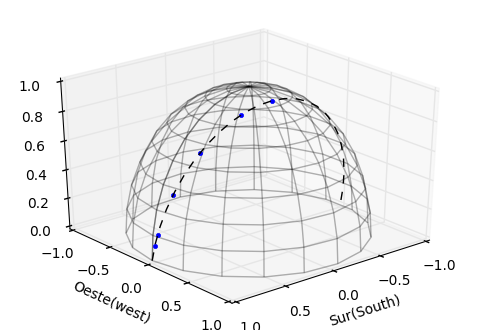

In [6]:

fig = plt.figure()
ax = fig.gca(projection='3d')
u, v = np.mgrid[0:2*pi:20j, 0:pi/2:10j]
x=cos(u)*sin(v)
y=sin(u)*sin(v)
z=cos(v)
ax.plot_wireframe(x, y, z, color="black",alpha=0.3)
ax.azim = 50
ax.plot(xcha,ycha, zcha, 'b.')
ax.plot(xi,yi, zi,'k--')
plt.xlabel("Sur(South)")
plt.ylabel("Oeste(west)")


In [14]:
%%latex
the following table shows 5 points in the path of the GC. They are in spherical coordinates defined as; $\theta$ in degrees starting at the zenith towars the horizon. $\theta$ also in degrees starting in the north and growing clockwise.


<IPython.core.display.Latex object>

In [8]:

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)


import random
table = ListTable()
table.append(['theta(deg)', 'phi(deg)'])
for i in range(0, len(theta_final)):
    table.append([theta_final[i], phi_final[i]+180.])

table



theta(deg),phi(deg)
79.1077923913,180.0
23.5525958921,237.266392874
43.7741057491,236.643014645
62.3040117086,234.669539355
83.6275968016,223.153897168
16.0,237.208491277


## Secundarios en el detector

In [9]:
%%latex


\begin{equation}
F= N_{prim} \, N_{sec} \int a{(\theta_t)}\, \eta{(\theta_t)} d{t}
\end{equation}


\begin{equation}
N_{primarios}= F_{f} \times  \pi  R^2  \times 2\pi \left(1-\cos\xi \right) 
\end{equation}


En esta ecuación $F_{f}$ es el flujo dado por la fuente previamente mencionada, el segundo término corresponde a area de la ZAD proyectada y el tercer término es la apertura angular del detector respecto a esta señal.
Si se toma D=20km y R=87mts, el número $N_{primarios}$ de lluvias relevantes estará entre unas 500 y 1000 lluvias por hora dependiendo de cual de los 6 flujos proporcionados se utilice.


<IPython.core.display.Latex object>

In [10]:

    
def powerLaw(E):
    result= 2.4e-12* (E ** -2.35)
    return result

def smoothlBrk(E):
    result = 3.62e-10 * (E **- 4.14) / (1+(E/11.8)**(2.1-4.14))
    return result

def exponentialCut(E):
    result = 2.8e-12 * (E **- 2.1) * np.exp(-E/12.8)
    return result

E =  np.logspace(-1, 2, num=100)

powe = map(powerLaw, E)
smooth = map(smoothlBrk, E)
expocut = map(exponentialCut, E)



In [17]:
def Nprim(x):
    """
    input-> reported flux in n*(cm^-2)*(s^-1)
    output-> relevant number of showers per hour per km^2
    """
    F= x*1e10*3600
    #
    R = 86.
    D = 20000.
    eta = np.arctan(R/D)
    result = F * np.pi * (R**2) * 2 * np.pi * (1-np.cos(eta))
    return result
    
    
def etadetheta(x):
    """
    input in degrees
    """
    theta = np.radians(x)
    A,B,C,D = 2.0503,-0.7299,-0.4760,0.1557
    result =  A*(np.cos(theta))**4 + B*(np.cos(theta))**3 +C*(np.cos(theta))**2 +D*(np.cos(theta))
    return result

def area(x):
    """
    input in degrees
    """
    theta = np.radians(x)
    #tank radius in meters
    r = 1.
    # tank hight in meters
    h = 1.2
    result = 2*r*h*np.sin(theta) + np.pi*r**2*np.cos(theta)
    return result

from scipy.integrate import quad
Flux = quad(smoothlBrk, .2,40)[0]
print Nprim(Flux)



600.016762946


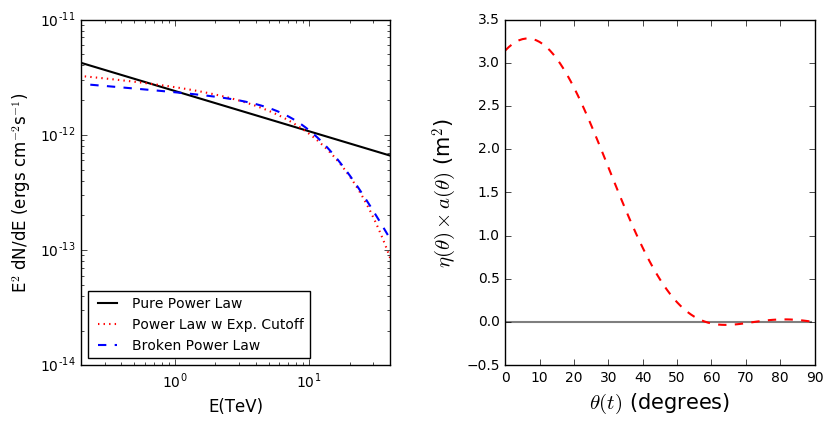

In [34]:
theta = np.arange(0,90,1)

fig , (ax,ax1) = plt.subplots(1,2,figsize=[8,4])

plt.tight_layout(pad=1, w_pad=5.5, h_pad=1.0)

ax.set_xlabel('E(TeV)',fontsize=12)
ax.set_ylabel(r'E$^2$ dN/dE (ergs cm$^{-2}$s$^{-1}$)',fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.2,40])
ax.set_ylim([1e-14,1e-11])
ax.plot(E, powe* (E**2),'k-',linewidth=1.5, label='Pure Power Law')
ax.plot(E,expocut*(E**2),'r:',linewidth=1.5, label='Power Law w Exp. Cutoff')
ax.plot(E, smooth*(E**2),'b--',linewidth=1.5, label= 'Broken Power Law') 
legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=10)
tankCS = area(theta)
tankCSnor = tankCS/max(tankCS)
product = etadetheta(theta) * tankCS
ax1.set_xlabel(r'$\theta(t)$ (degrees)',fontsize=15)
ax1.set_ylabel(r'$\eta(\theta)\times a(\theta)$ (m$^2$)',fontsize=15)
#ax1.set_xlim([0.2,40])
#ax1.set_ylim([-0.2,1.3])
ax1.plot(theta, [0 for i in theta],'k-',linewidth=1.5,alpha=0.5)
#ax1.plot(theta,etadetheta(theta),'r--',linewidth=1.5, label ='Asorey Nunez-Castineyra fit')
#ax1.plot(theta,tankCSnor,'g--',linewidth=1.5, label= 'Broken Power Law')
ax1.plot(theta,product,'r--',linewidth=1.5) 
#legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=10)

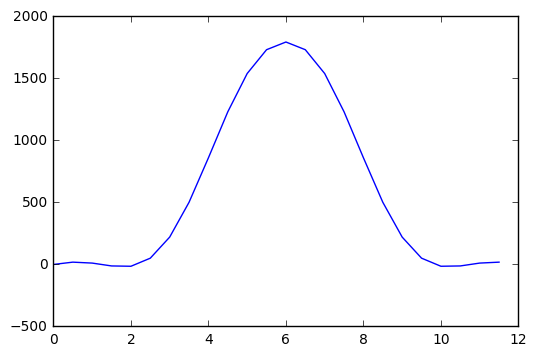

In [40]:


def theta(t,w):
    W=radians(w) #velocidad angular de rotacion de la tierra
    wt= W*t+(pi/2)
    th=arccos(cos(la)*cos(wt))
    THdegrees=degrees(th)
    return th

prims = Nprim(Flux)
def finalflux(t):
    TEdegrees=degrees(arcsin(-S*cos(theta(t,15))*cos(phi(t,15))+C*sin(theta(t,15))))
    inside = (cos(theta(t,15))*sin(phi(t,15)))/((C*cos(theta(t,15))*cos(phi(t,15)))+(S*sin(theta(t,15))))
    Phi= -degrees(arctan(inside))+180
    zcha=(-sin(lcha)*cos(radians(Phi))*sin(radians(TEdegrees)))+(cos(lcha)*cos(radians(TEdegrees)))
    theta_t= degrees(arccos(zcha))
    result = prims* area(theta_t)* etadetheta(theta_t)
    return result

fig, ax =plt.subplots()
x = np.arange(0,12,0.5)
y = map(finalflux,x)
ax.plot(x,finalflux(x))